In [1]:
# essential libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from google.colab import files

uploaded = files.upload()

In [2]:
df = pd.read_csv('cell2celltrain.csv') # loading the dataset

In [3]:
pd.set_option('display.max_columns', None) # Code to display all the columns 


In [4]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


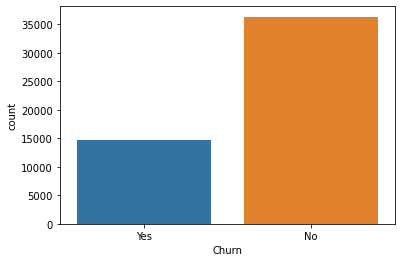

In [5]:
# To check imbalance in the target Variable (Churn)
sns.countplot(df['Churn'])
plt.show()
# We can infer that the target variable is imbalanced.

**Checking for Null Values**


In [6]:
df.isnull().sum() # Checking the total number of null values in feature.

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

## **Percentage Null**

In [7]:
round(df.isnull().sum() / len(df) * 100,3) # In percentage terms null values for each feature.

CustomerID                   0.000
Churn                        0.000
MonthlyRevenue               0.306
MonthlyMinutes               0.306
TotalRecurringCharge         0.306
DirectorAssistedCalls        0.306
OverageMinutes               0.306
RoamingCalls                 0.306
PercChangeMinutes            0.719
PercChangeRevenues           0.719
DroppedCalls                 0.000
BlockedCalls                 0.000
UnansweredCalls              0.000
CustomerCareCalls            0.000
ThreewayCalls                0.000
ReceivedCalls                0.000
OutboundCalls                0.000
InboundCalls                 0.000
PeakCallsInOut               0.000
OffPeakCallsInOut            0.000
DroppedBlockedCalls          0.000
CallForwardingCalls          0.000
CallWaitingCalls             0.000
MonthsInService              0.000
UniqueSubs                   0.000
ActiveSubs                   0.000
ServiceArea                  0.047
Handsets                     0.002
HandsetModels       

# Null Values are very less. So the records can be removed.

In [8]:
for i in df.columns:
  df.dropna(subset=[i],inplace=True)
# removing all the null values given that only 5 features had null values and that too upto a max of 1%

In [9]:
df.isnull().sum() # Rechecking for null values.

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

## **Exploratory Data Analysis**

In [10]:
cat_df = df.select_dtypes(include=[np.object]) # Seperating cateogrical and numerical columns 
num_df = df.select_dtypes(include=[np.number])

In [11]:
len(cat_df.columns)

23

In [12]:
len(num_df.columns)

35

## Analysing Churn

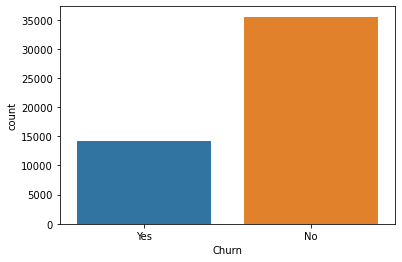

No     35507
Yes    14245
Name: Churn, dtype: int64


In [13]:
sns.countplot(df['Churn'])
plt.show()

print(df.Churn.value_counts())

# Analysing All Categorical Columns

In [14]:
cat_df.columns # Categorical column names.

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

### 1. Service Area

In [15]:
# Total Serviced Areas
df.ServiceArea.nunique()

743

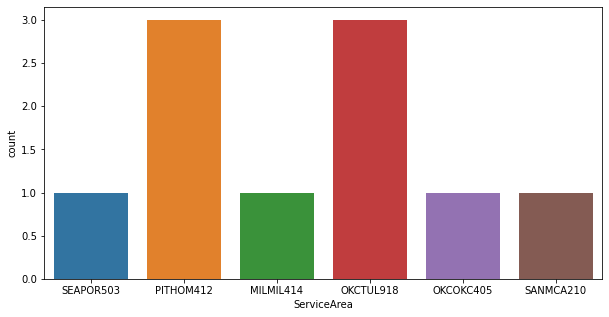

NYCBRO917    1646
DALDAL214    1479
HOUHOU281    1471
NYCMAN917    1156
DALFTW817     771
APCFCH703     755
SANSAN210     704
APCSIL301     648
SFROAK510     597
SANAUS512     594
Name: ServiceArea, dtype: int64

In [61]:
# Top Serviced Areas
plt.figure(figsize=(10,5))
df['ServiceArea'].value_counts
plt.show()

df['ServiceArea'].value_counts()[:10]

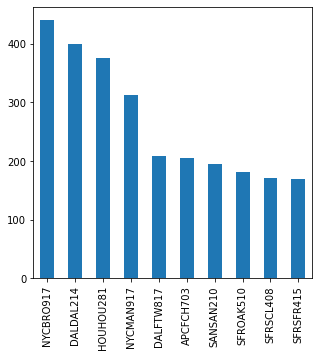

NYCBRO917    441
DALDAL214    400
HOUHOU281    376
NYCMAN917    312
DALFTW817    209
APCFCH703    205
SANSAN210    195
SFROAK510    182
SFRSCL408    171
SFRSFR415    169
Name: ServiceArea, dtype: int64

In [17]:
# ServiceArea where Churn Response was 'Yes'
plt.figure(figsize=(5,5))
df[df.Churn == 'Yes']['ServiceArea'].value_counts()[:10].plot(kind='bar')
plt.show()

df[df.Churn == 'Yes']['ServiceArea'].value_counts()[:10]

### 2. Children in HH

In [62]:
children_df = pd.DataFrame(df['ChildrenInHH'].value_counts())
children_df

,ChildrenInHH
No,37483
Yes,12269


([<matplotlib.patches.Wedge at 0x1e73ae626d0>,
 [Text(-0.7860735517609312, 0.7694727878372013, '75.34'),
  Text(0.7860735877825512, -0.7694727510384418, '24.66')])

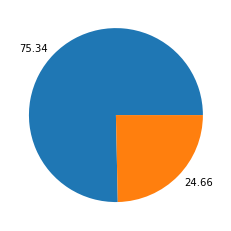

In [81]:
plt.pie(df['ChildrenInHH'].value_counts(),labels=[round(len(df[df.ChildrenInHH == 'No']) * 100 / len(df),2),
                                                  round(len(df[df.ChildrenInHH == 'Yes']) * 100 / len(df),2)])

In [19]:
children_df['Percentage'] = [round(len(df[df.ChildrenInHH == 'No']) * 100 / len(df),2),
                             round(len(df[df.ChildrenInHH == 'Yes']) * 100 / len(df),2)]
children_df

,ChildrenInHH,Percentage
No,37483,75.34
Yes,12269,24.66


In [20]:
# Cases where Churn response was Yes and ChildrenInHH was Yes
print('Total response where both Churn and Children In HH was Yes : \n',
      len(df[(df.Churn == 'Yes') & (df['ChildrenInHH'] == 'Yes')]))

print('In Percentage Terms : \n',
     round(len(df[(df.Churn == 'Yes') & (df['ChildrenInHH'] == 'Yes')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')

Total response where both Churn and Children In HH was Yes : 
 3605
In Percentage Terms : 
 25.31 %


In [21]:
len(df['Churn'])

49752

### 3. Hand Set Refurbished

In [22]:
handsetrefurbished_df = pd.DataFrame(df.HandsetRefurbished.value_counts())
handsetrefurbished_df['Percentage'] = [round(len(df[df.HandsetRefurbished == 'No']) * 100 / len(df),2),
                             round(len(df[df.HandsetRefurbished == 'Yes']) * 100 / len(df),2)]
handsetrefurbished_df

,HandsetRefurbished,Percentage
No,42852,86.13
Yes,6900,13.87


In [23]:
# Cases where Churn Response was 'Yes' and HandsetRefurbished was 'Yes'
print('Total response where both Churn and Handset Refurbished was Yes : \n',
      len(df[(df.Churn == 'Yes') & (df['HandsetRefurbished'] == 'Yes')]))

print('In Percentage Terms out of Total Churn : \n',
     round(len(df[(df.Churn == 'Yes') & (df['HandsetRefurbished'] == 'Yes')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')
print('In Percentage Terms out of Total HandsetRefurbished Users : \n',
     round(len(df[(df.Churn == 'Yes') & (df['HandsetRefurbished'] == 'Yes')])*100 / len(df[df['HandsetRefurbished'] == 'Yes']),2),'%')

Total response where both Churn and Handset Refurbished was Yes : 
 2209
In Percentage Terms out of Total Churn : 
 15.51 %
In Percentage Terms out of Total HandsetRefurbished Users : 
 32.01 %


### 4. Handset Web Capable

In [24]:
handsetwebcapable_df = pd.DataFrame(df.HandsetWebCapable.value_counts())
handsetwebcapable_df['Percentage'] = [round(len(df[df.HandsetWebCapable == 'Yes']) * 100 / len(df),2),
                             round(len(df[df.HandsetWebCapable == 'No']) * 100 / len(df),2)]
handsetwebcapable_df

,HandsetWebCapable,Percentage
Yes,44905,90.26
No,4847,9.74


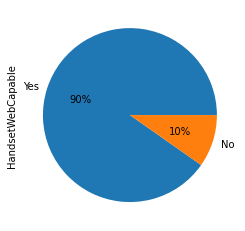

In [83]:
df['HandsetWebCapable'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [25]:
# Cases where Churn was 'Yes' and Handset Web Capable was 'NO'
print('Total response where Handset Web Capable was No and Churn was Yes :\n',
      len(df[(df.Churn == 'Yes') & (df['HandsetWebCapable'] == 'No')]))

print('In Percentage Terms out of Total Churn (Yes): \n',
     round(len(df[(df.Churn == 'Yes') & (df['HandsetWebCapable'] == 'No')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')

print('In Percentage Terms out of Total non-WebCapable Users : \n',
     round(len(df[(df.Churn == 'Yes') & (df['HandsetWebCapable'] == 'No')])*100 / len(df[df['HandsetWebCapable'] == 'No']),2),'%')

Total response where Handset Web Capable was No and Churn was Yes :
 1804
In Percentage Terms out of Total Churn (Yes): 
 12.66 %
In Percentage Terms out of Total non-WebCapable Users : 
 37.22 %


In [26]:
len(df[df['Churn'] == 'Yes'])

14245

### 5. Truck Owner

In [27]:
Truckowner_df = pd.DataFrame(df.TruckOwner.value_counts())
Truckowner_df['Percentage'] = [round(len(df[df.TruckOwner == 'No']) * 100 / len(df),2),
                             round(len(df[df.TruckOwner == 'Yes']) * 100 / len(df),2)]
Truckowner_df

,TruckOwner,Percentage
No,40280,80.96
Yes,9472,19.04


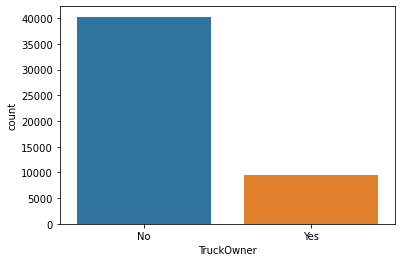

In [84]:
sns.countplot(df['TruckOwner'])
plt.show()

In [28]:
# Responses where TruckOwner is Yes and Churn is Yes

print('Total response where Truck Owner was Yes and Churn was Yes :\n',
      len(df[(df.Churn == 'Yes') & (df['TruckOwner'] == 'Yes')]))

print('In Percentage Terms : \n',
     round(len(df[(df.Churn == 'Yes') & (df['TruckOwner'] == 'Yes')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')
print('In Percentage Terms out of Total Truck Owners : \n',
     round(len(df[(df.Churn == 'Yes') & (df['TruckOwner'] == 'Yes')])*100 / len(df[df['TruckOwner'] == 'Yes']),2),'%')

Total response where Truck Owner was Yes and Churn was Yes :
 2669
In Percentage Terms : 
 18.74 %
In Percentage Terms out of Total Truck Owners : 
 28.18 %


### 6. RV Owner

In [29]:
RVOwner_df = pd.DataFrame(df.RVOwner.value_counts())
RVOwner_df['Percentage'] = [round(len(df[df.RVOwner == 'No']) * 100 / len(df),2),
                             round(len(df[df.RVOwner == 'Yes']) * 100 / len(df),2)]
RVOwner_df

,RVOwner,Percentage
No,45619,91.69
Yes,4133,8.31


In [30]:
# Responses where RVOwner is Yes and Churn is Yes

print('Total response where Truck Owner was Yes and Churn was Yes :\n',
      len(df[(df.Churn == 'Yes') & (df['RVOwner'] == 'Yes')]))

print('In Percentage Terms out of Total Churn (Yes): \n',
     round(len(df[(df.Churn == 'Yes') & (df['RVOwner'] == 'Yes')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')

print('In Percentage Terms out of Total RVOwners : \n',
     round(len(df[(df.Churn == 'Yes') & (df['RVOwner'] == 'Yes')])*100 / len(df[df['RVOwner'] == 'Yes']),2),'%')

Total response where Truck Owner was Yes and Churn was Yes :
 1163
In Percentage Terms out of Total Churn (Yes): 
 8.16 %
In Percentage Terms out of Total RVOwners : 
 28.14 %


### 7. Home Owner

In [31]:
HomeOwner_df = pd.DataFrame(df.Homeownership.value_counts())
HomeOwner_df['Percentage'] = [round(len(df[df.Homeownership == 'Known']) * 100 / len(df),2),
                             round(len(df[df.Homeownership == 'Unknown']) * 100 / len(df),2)]
HomeOwner_df

,Homeownership,Percentage
Known,33725,67.79
Unknown,16027,32.21


In [90]:
# Responses where HomeOwnership is Unknown and Churn is Yes

print('Total response where Home Ownership was Unknown and Churn was Yes :\n',
      len(df[(df.Churn == 'Yes') & (df['Homeownership'] == 'Unknown')]))

print('In Percentage Terms out of Total Churn (Yes): \n',
     round(len(df[(df.Churn == 'Yes') & (df['Homeownership'] == 'Unknown')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')

print('In Percentage Terms out of Uknown Homewonership : \n',
     round(len(df[(df.Churn == 'Yes') & (df['Homeownership'] == 'Unknown')])*100 / len(df[df['Homeownership'] == 'Unknown']),2),'%')

Total response where Home Ownership was Unknown and Churn was Yes :
 4733
In Percentage Terms out of Total Churn (Yes): 
 33.23 %
In Percentage Terms out of Uknown Homewonership : 
 29.53 %


### 8. Buys Via Mail Order

In [33]:
buysviamail_df = pd.DataFrame(df.BuysViaMailOrder.value_counts())
buysviamail_df['Percentage'] = [round(len(df[df.BuysViaMailOrder == 'No']) * 100 / len(df),2),
                             round(len(df[df.BuysViaMailOrder == 'Yes']) * 100 / len(df),2)]
buysviamail_df

,BuysViaMailOrder,Percentage
No,31432,63.18
Yes,18320,36.82


In [34]:
# Responses where Buys Via mail Order is No and Churn is Yes

print('Total response where Truck Owner was Yes and Churn was Yes :\n',
      len(df[(df.Churn == 'Yes') & (df['BuysViaMailOrder'] == 'No')]))

print('In Percentage Terms out of Total Churn (Yes): \n',
     round(len(df[(df.Churn == 'Yes') & (df['BuysViaMailOrder'] == 'No')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')

print('In Percentage Terms out of those who dont buy via MailOrder : \n',
     round(len(df[(df.Churn == 'Yes') & (df['BuysViaMailOrder'] == 'No')])*100 / len(df[df['BuysViaMailOrder'] == 'No']),2),'%')

Total response where Truck Owner was Yes and Churn was Yes :
 9237
In Percentage Terms out of Total Churn (Yes): 
 64.84 %
In Percentage Terms out of those who dont buy via MailOrder : 
 29.39 %


### 9. Responds to Mail Offers

In [35]:
responds2mail_df = pd.DataFrame(df.RespondsToMailOffers.value_counts())
responds2mail_df['Percentage'] = [round(len(df[df.RespondsToMailOffers == 'No']) * 100 / len(df),2),
                             round(len(df[df.RespondsToMailOffers == 'Yes']) * 100 / len(df),2)]
responds2mail_df

,RespondsToMailOffers,Percentage
No,30667,61.64
Yes,19085,38.36


### 10. Opt Out Mailings

In [36]:
optout_df = pd.DataFrame(df.OptOutMailings.value_counts())
optout_df['Percentage'] = [round(len(df[df.OptOutMailings == 'No']) * 100 / len(df),2),
                             round(len(df[df.OptOutMailings == 'Yes']) * 100 / len(df),2)]
optout_df

,OptOutMailings,Percentage
No,49006,98.5
Yes,746,1.5


### 11. Non US Travel

In [37]:
travel_df = pd.DataFrame(df.NonUSTravel.value_counts())
travel_df['Percentage'] = [round(len(df[df.NonUSTravel == 'No']) * 100 / len(df),2),
                             round(len(df[df.NonUSTravel == 'Yes']) * 100 / len(df),2)]
travel_df

,NonUSTravel,Percentage
No,46896,94.26
Yes,2856,5.74


### 12. Owns Computer

In [38]:
ownscomputer_df = pd.DataFrame(df.OwnsComputer.value_counts())
ownscomputer_df['Percentage'] = [round(len(df[df.OwnsComputer == 'No']) * 100 / len(df),2),
                             round(len(df[df.OwnsComputer == 'Yes']) * 100 / len(df),2)]
ownscomputer_df

,OwnsComputer,Percentage
No,40368,81.14
Yes,9384,18.86


In [88]:
print('Total response where Owns Compter was No and Churn was Yes :\n',
      len(df[(df.Churn == 'Yes') & (df['OwnsComputer'] == 'No')]))

print('In Percentage Terms out of Total Churn (Yes): \n',
     round(len(df[(df.Churn == 'Yes') & (df['OwnsComputer'] == 'No')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')

print('In Percentage Terms out of those who do not own a computer : \n',
     round(len(df[(df.Churn == 'Yes') & (df['OwnsComputer'] == 'No')])*100 / len(df[df['BuysViaMailOrder'] == 'No']),2),'%')

Total response where Owns Compter was No and Churn was Yes :
 11569
In Percentage Terms out of Total Churn (Yes): 
 81.21 %
In Percentage Terms out of those who do not own a computer : 
 36.81 %


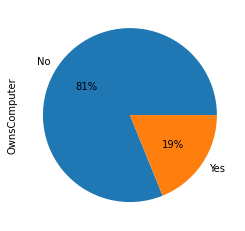

In [89]:
df['OwnsComputer'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

### 13. Has Credit Card?

In [39]:
credit_df = pd.DataFrame(df.HasCreditCard.value_counts())
credit_df['Percentage'] = [round(len(df[df.HasCreditCard == 'Yes']) * 100 / len(df),2),
                             round(len(df[df.HasCreditCard == 'No']) * 100 / len(df),2)]
credit_df

,HasCreditCard,Percentage
Yes,34241,68.82
No,15511,31.18


### 14. New Cellphone User?

In [40]:
cellphone_df = pd.DataFrame(df.NewCellphoneUser.value_counts())
cellphone_df['Percentage'] = [round(len(df[df.NewCellphoneUser == 'No']) * 100 / len(df),2),
                             round(len(df[df.NewCellphoneUser == 'Yes']) * 100 / len(df),2)]
cellphone_df

,NewCellphoneUser,Percentage
No,40141,80.68
Yes,9611,19.32


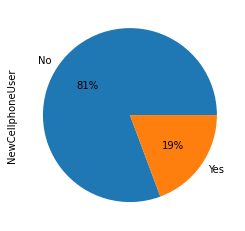

In [85]:
df['NewCellphoneUser'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

In [41]:
# New Cellphone users who have responded Yes to Churn


print('Total response where New Cellphone users who have responded Yes to Churn :\n',
      len(df[(df.Churn == 'Yes') & (df['NewCellphoneUser'] == 'Yes')]))

print('In Percentage Terms out of Total Churn (Yes): \n',
     round(len(df[(df.Churn == 'Yes') & (df['NewCellphoneUser'] == 'Yes')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')

print('In Percentage Terms out of those who are New Cellphone User : \n',
     round(len(df[(df.Churn == 'Yes') & (df['NewCellphoneUser'] == 'Yes')])*100 / len(df[df['NewCellphoneUser'] == 'Yes']),2),'%')


Total response where New Cellphone users who have responded Yes to Churn :
 2684
In Percentage Terms out of Total Churn (Yes): 
 18.84 %
In Percentage Terms out of those who are New Cellphone User : 
 27.93 %


### 15. Not New Cell Phone User?

In [42]:
# The columns can be dropped because it is Opposite of New Cell Phone User.

### 16. Owns Motorcycle?

In [43]:
mcycle_df = pd.DataFrame(df.OwnsMotorcycle.value_counts())
mcycle_df['Percentage'] = [round(len(df[df.OwnsMotorcycle == 'No']) * 100 / len(df),2),
                             round(len(df[df.OwnsMotorcycle == 'Yes']) * 100 / len(df),2)]
mcycle_df

,OwnsMotorcycle,Percentage
No,49078,98.65
Yes,674,1.35


In [44]:
# The column can be dropped as just 1.3 % Own a Motor Cycle

In [45]:
# New Cellphone users who have responded Yes to Churn


print('Total response where New Cellphone users who have responded Yes to Churn :\n',
      len(df[(df.Churn == 'Yes') & (df['OwnsMotorcycle'] == 'Yes')]))

print('In Percentage Terms out of Total Churn (Yes): \n',
     round(len(df[(df.Churn == 'Yes') & (df['OwnsMotorcycle'] == 'Yes')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')

print('In Percentage Terms out of those who own a Motorcycle : \n',
     round(len(df[(df.Churn == 'Yes') & (df['OwnsMotorcycle'] == 'Yes')])*100 / len(df[df['OwnsMotorcycle'] == 'Yes']),2),'%')


Total response where New Cellphone users who have responded Yes to Churn :
 213
In Percentage Terms out of Total Churn (Yes): 
 1.5 %
In Percentage Terms out of those who own a Motorcycle : 
 31.6 %


### 17. Handset Price

In [46]:
df['HandsetPrice'].value_counts() # --> The column can be converted to Numerical.

Unknown    28263
30          7147
150         4024
130         2043
80          1901
10          1869
60          1730
200         1227
100         1209
40           240
400           45
250           20
300           12
180            9
500            7
240            6
Name: HandsetPrice, dtype: int64

In [87]:
len(df)

49752

### 18. Made Retention Call to Team

In [47]:
df['MadeCallToRetentionTeam'].value_counts()

No     48131
Yes     1621
Name: MadeCallToRetentionTeam, dtype: int64

In [48]:
# Churners who have made retention call


print('Total response where those who had responded to Yes have made call to Retention Team :\n',
      len(df[(df.Churn == 'Yes') & (df['MadeCallToRetentionTeam'] == 'Yes')]))

print('In Percentage Terms out of Total Churn (Yes): \n',
     round(len(df[(df.Churn == 'Yes') & (df['MadeCallToRetentionTeam'] == 'Yes')])*100 / len(df[df['Churn'] == 'Yes']),2),'%')

#print('In Percentage Terms out of those who made retention calls to Yes : \n',
    # round(len(df[(df.Churn == 'Yes') & (df['MadeCallToRetentionTeam'] == 'Yes')])*100 / len(df[df['MadeCallToRetentionTeam'] == 'Yes']),2),'%')


Total response where those who had responded to Yes have made call to Retention Team :
 706
In Percentage Terms out of Total Churn (Yes): 
 4.96 %


### 19. Credit Rating

<AxesSubplot:>

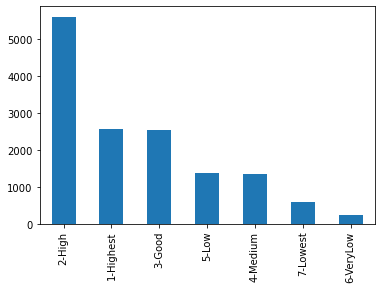

In [49]:
df[df['Churn'] == 'Yes']['CreditRating'].value_counts().plot(kind='bar')

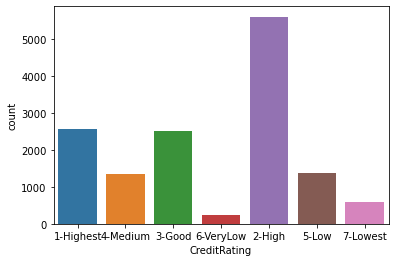

In [50]:
sns.countplot(df[df['Churn'] == 'Yes']['CreditRating'])
plt.show()

### 20. Prizm Code

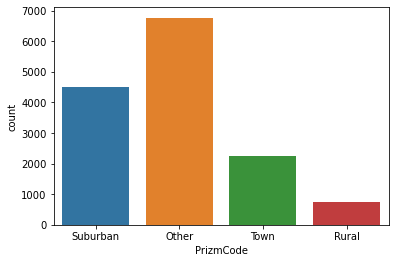

In [51]:
sns.countplot(df[df['Churn'] == 'Yes']['PrizmCode'])
plt.show()

### 21. Occupation

In [103]:
occ_df = pd.DataFrame(df['Occupation'].value_counts())
occ_df['Percentage'] = round(df['Occupation'].value_counts() * 100 / len(df),2)
occ_df

,Occupation,Percentage
Other,36453,73.27
Professional,8681,17.45
Crafts,1507,3.03
Clerical,979,1.97
Self,872,1.75
Retired,726,1.46
Student,377,0.76
Homemaker,157,0.32


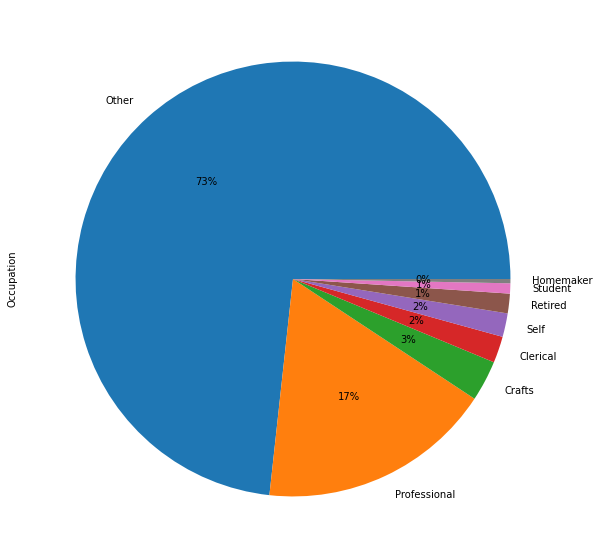

In [95]:
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

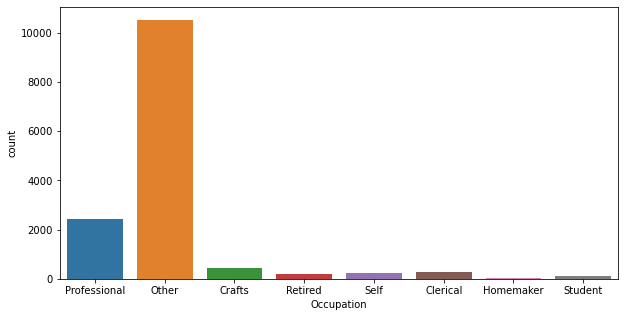

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(df[df['Churn'] == 'Yes']['Occupation'])
plt.show()

### 22. Marital Status

In [54]:
df['MaritalStatus'].value_counts()

Unknown    18649
Yes        18506
No         12597
Name: MaritalStatus, dtype: int64

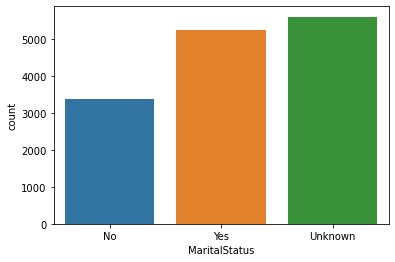

In [55]:
sns.countplot(df[df['Churn'] == 'Yes']['MaritalStatus'])
plt.show()